a and b are friends.
b and e are friends.
e and m are friends.
m and p are friends.
a and z are not friends.
b and q are not friends.


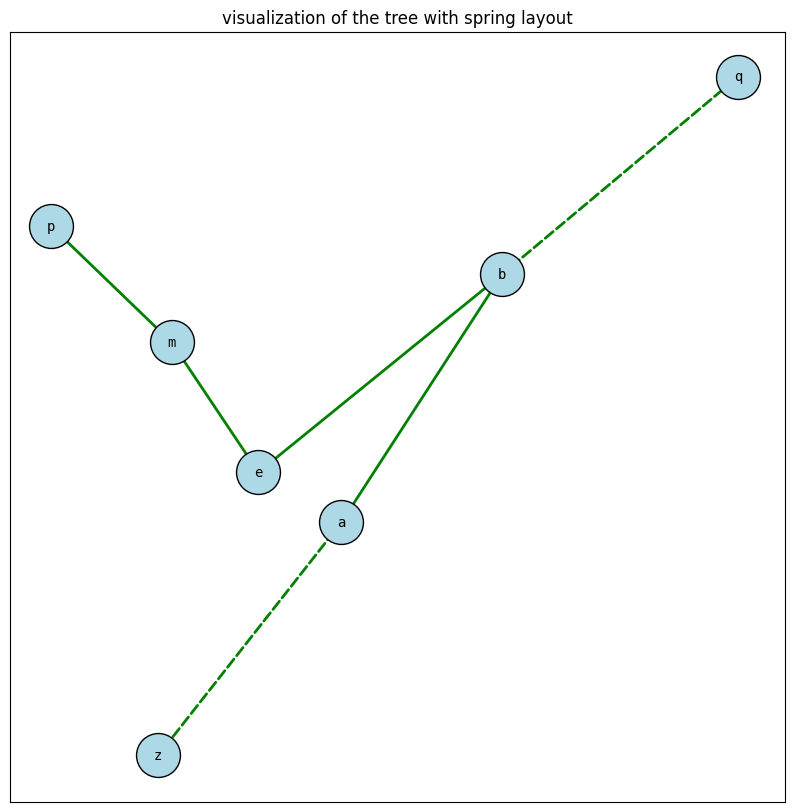

In [1]:
import matplotlib.pyplot as plt
import networkx as nx

# Function to build the tree from pairs
def build_tree_from_pairs(pairs):
    # Create a directed graph to represent the tree
    G = nx.DiGraph()

    # Add edges based on provided pairs
    for a, b in pairs:
        G.add_edge(a, b)

    # Optional: Identify the root (a node with incoming edges)
    root_candidates = [node for node in G.nodes() if G.in_degree(node) == 0]

    if len(root_candidates) != 1:
        raise ValueError("The tree should have exactly one root node.")
    root = root_candidates[0] if root_candidates else None

    return G, root

# Function to check and print relationship status
def check_relationships(pairs, friends):
    for pair in pairs:
        if pair in friends:
            print(f"{pair[0]} and {pair[1]} are friends.")
        else:
            print(f"{pair[0]} and {pair[1]} are not friends.")

# Function to draw the tree with customization based on friendship status
def draw_tree(G, layout_choice='spring', root=None, friends=set()):
    # Determine the position of the nodes based on the selected layout
    if layout_choice == 'spring':
        pos = nx.spring_layout(G)
    elif layout_choice == 'planar':
        pos = nx.planar_layout(G)
    elif layout_choice == 'spiral':
        pos = nx.spiral_layout(G)
    elif layout_choice == 'shell':
        pos = nx.shell_layout(G)
    else:
        pos = nx.spiral_layout(G)

    plt.figure(figsize=(10, 10))
    # Customise edge colours and styles based on friendship status
    edge_styles = ['solid' if (u, v) in friends else 'dashed' for u, v in G.edges()]

    # Draw the edges with specified styles and colours
    for (u, v), edge_style in zip(G.edges(), edge_styles):
        nx.draw_networkx_edges(G, pos, edgelist=[(u, v)], edge_color='green', style=edge_style, width=2)

    # Draw the nodes and labels separately
    nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=1000, edgecolors='black')
    nx.draw_networkx_labels(G, pos, font_size=10, font_family='monospace')

    plt.title(f"visualization of the tree with {layout_choice} layout")
    plt.show()


# Building the tree and graph
# Pairs
pairs = [('a', 'b'), ('b', 'e'), ('e', 'm'), ('m', 'p'), ('a', 'z'), ('b', 'q')]
# Friends
friends = [('a', 'b'), ('b', 'e'), ('e', 'm'), ('m', 'p')]

# Build the tree
tree, root = build_tree_from_pairs(pairs)

# Check relationships
check_relationships(pairs, friends)

# Draw the tree
layout_choice = 'spring'
draw_tree(tree, layout_choice=layout_choice, root=root, friends=friends)